In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F, lognormal
from configs.parameters import *
from configs.filenames import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from scipy.stats import lognorm
import os

C = float(os.getenv("C", C))
itr = 180000

print(f"📢 Using parameters: C={C}, itr={itr}")

📢 Using parameters: C=0.01, itr=180000


In [2]:
apply_plot_settings()
output_dir = "../data/"

In [3]:
# discrete
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "Coupled", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
td, EE1d, EE2d, II1d, II2d = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4]

# gaussian
params = get_params_for_filename(param_keys, globals())
filename = get_filename("gaussian", "Coupled", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
tg, synEE1g, synEE2g, synII1g, synII2g, EE1g, EE2g, II1g, II2g = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8]

# lognormal
params = get_params_for_filename(param_keys, globals())
filename = get_filename("lognormal", "Coupled", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
tl, synEE1l, synEE2l, synII1l, synII2l, EE1l, EE2l, II1l, II2l = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8]

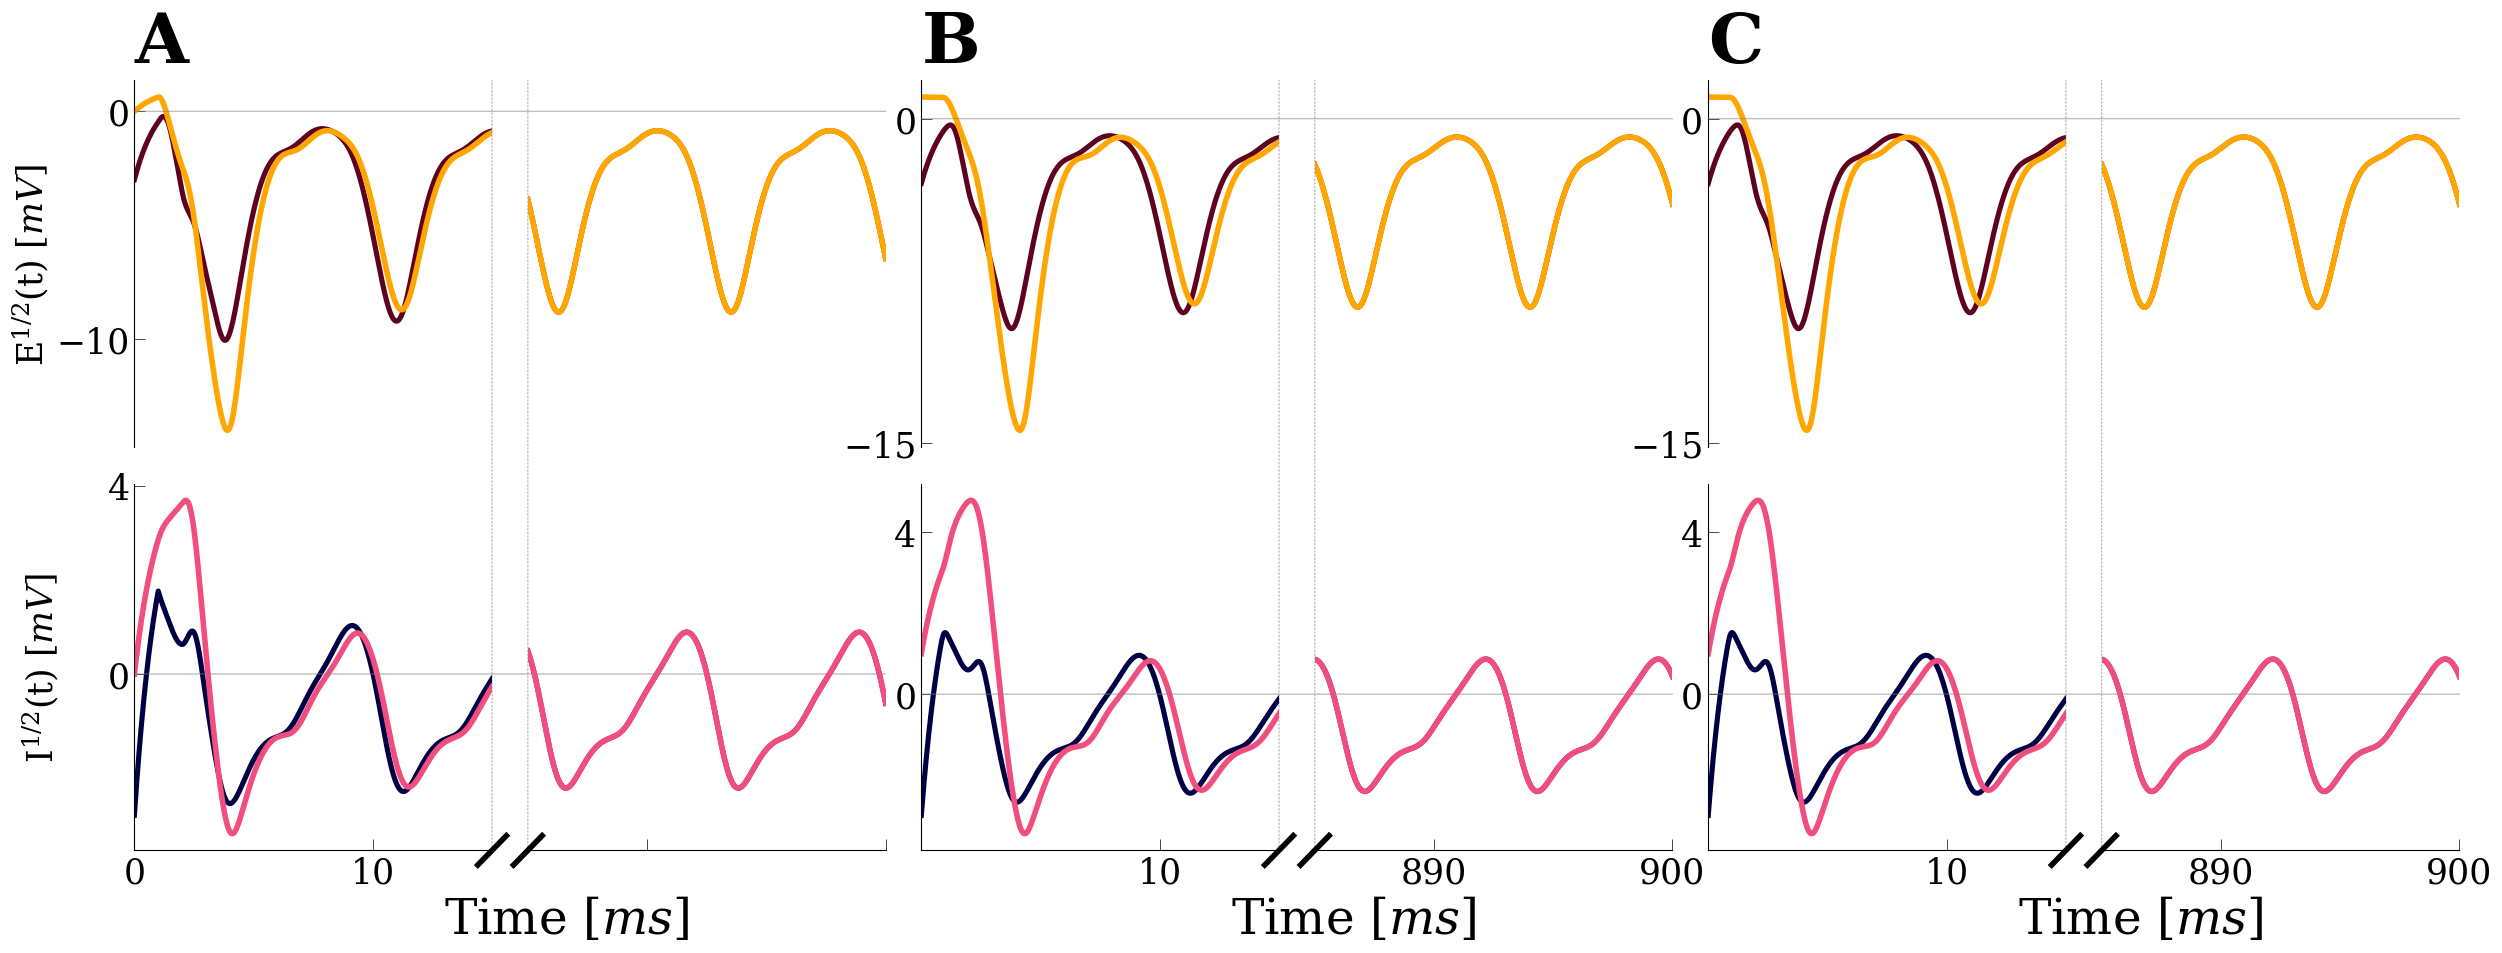

In [4]:
fig = plt.figure(figsize = (30,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax1 = plt.subplot(261)
ax2 = plt.subplot(262)
ax3 = plt.subplot(267, sharex=ax1)
ax4 = plt.subplot(268, sharex=ax2)

ax5 = plt.subplot(263)
ax6 = plt.subplot(264)
ax7 = plt.subplot(269, sharex=ax5)
ax8 = plt.subplot(2,6,10, sharex=ax6)

ax9 = plt.subplot(265)
ax10 = plt.subplot(2,6,6)
ax11 = plt.subplot(2,6,11, sharex=ax9)
ax12 = plt.subplot(2,6,12, sharex=ax10)


ax1.plot(td, EE1d, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax1.plot(td, EE2d, label='E$^2$', color = "#ffa600", linewidth = 4)
ax1.set_xlim(0,15)
ax1.set_ylabel('E$^{1/2}$(t) $[mV]$', color = "black")
ax1.spines['bottom'].set_visible(False)
ax1.set_yticks([0,-10])
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(axis='x', colors='black', length=0)
ax1.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')

ax2.plot(td, EE1d, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax2.plot(td, EE2d, label='E$^2$', color = "#ffa600", linewidth = 4)
ax2.set_xlim(885,900)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax2.legend(loc='best')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.tick_params(axis='y', colors='black', length=0)
ax2.tick_params(axis='x', colors='black', length=0)
#ax2.set_xticks([])
ax2.tick_params(axis='y', colors='white')

ax3.plot(td, II1d, label='I$^1$', color = "#000044", linewidth = 3.7)
ax3.plot(td, II2d, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax3.set_xlim(0,15)
ax3.set_ylabel('I$^{1/2}$(t) $[mV]$', color = "black", labelpad = 33.5)
#ax3.spines['bottom'].set_visible(False)
ax3.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax3.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')
ax3.set_xticks([0,10])
ax3.set_yticks([0,4])
#ax3.axvline(20,0,10, ls='--', color='grey', lw=3, alpha=0.5)


ax4.plot(td, II1d, label='I$^1$', color = "#000044", linewidth = 3.7)
ax4.plot(td, II2d, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax4.set_xlim(885,900)
ax4.set_xticks([890,900])
ax4.spines['left'].set_visible(False)
#ax4.spines['bottom'].set_visible(False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.tick_params(axis='y', colors='black', length=0)
ax4.tick_params(axis='x', colors='black', length=0)
ax4.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax4.tick_params(axis='y', colors='white', left=False)
#ax4.legend(loc='best')

d = .04  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax3.transAxes, color='black', clip_on=False, linewidth = 4)
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

_, ytop1 = ax1.get_ylim()
ybot3, _ = ax3.get_ylim()
line1 = ConnectionPatch(xyA=(15, ybot3), xyB=(15, ytop1), coordsA="data", coordsB="data", axesA=ax3, axesB=ax1,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax3.add_artist(line1)

_, ytop2 = ax2.get_ylim()
ybot4, _ = ax4.get_ylim()
line2 = ConnectionPatch(xyA=(885, ybot4), xyB=(885, ytop2), coordsA="data", coordsB="data", axesA=ax4, axesB=ax2,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax4.add_artist(line2)

line3 = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax2.add_artist(line3)

line4 = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax4, axesB=ax3,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax4.add_artist(line4)



ax5.plot(tg, EE1g, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax5.plot(tg, EE2g, label='E$^2$', color = "#ffa600", linewidth = 4)
ax5.set_xlim(0,15)
#ax5.set_ylabel('E$^i$(t) $[mV]$', color = "black")
ax5.spines['bottom'].set_visible(False)
ax5.set_yticks([0,-15])
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.tick_params(axis='y', colors='black', length=0)
ax5.tick_params(axis='x', colors='black', length=0)
ax5.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')

ax6.plot(tg, EE1g, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax6.plot(tg, EE2g, label='E$^2$', color = "#ffa600", linewidth = 4)
ax6.set_xlim(885,900)
ax6.spines['bottom'].set_visible(False)
ax6.spines['left'].set_visible(False)
#ax6.legend(loc='best')
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.tick_params(axis='y', colors='black', length=0)
ax6.tick_params(axis='x', colors='black', length=0)
ax6.tick_params(axis='x', colors='white')
ax6.tick_params(axis='y', colors='white')

ax7.plot(tg, II1g, label='I$^1$', color = "#000044", linewidth = 3.7)
ax7.plot(tg, II2g, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax7.set_xlim(0,15)
#ax7.set_ylabel('I$^i$(t) $[mV]$', color = "black", labelpad = 20)
#ax7.spines['bottom'].set_visible(False)
ax7.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax7.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')
ax7.set_xticks([10])
ax7.set_yticks([0,4])
#ax3.axvline(20,0,10, ls='--', color='grey', lw=3, alpha=0.5)

ax8.plot(tg, II1g, label='I$^1$', color = "#000044", linewidth = 3.7)
ax8.plot(tg, II2g, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax8.set_xlim(885,900)
ax8.set_xticks([890,900])
ax8.spines['left'].set_visible(False)
#ax8.spines['bottom'].set_visible(False)
plt.setp(ax8.get_yticklabels(), visible=False)
ax8.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax8.tick_params(axis='y', colors='white', left=False)
#ax8.legend(loc='best')

d = .04  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax7.transAxes, color='black', clip_on=False, linewidth = 4)
ax7.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax8.transAxes)  # switch to the bottom axes
ax8.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

_, ytop1 = ax5.get_ylim()
ybot3, _ = ax7.get_ylim()
line1 = ConnectionPatch(xyA=(15, ybot3), xyB=(15, ytop1), coordsA="data", coordsB="data", axesA=ax7, axesB=ax5,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax7.add_artist(line1)

_, ytop2 = ax6.get_ylim()
ybot4, _ = ax8.get_ylim()
line2 = ConnectionPatch(xyA=(885, ybot4), xyB=(885, ytop2), coordsA="data", coordsB="data", axesA=ax8, axesB=ax6,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax8.add_artist(line2)


line1g = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax6, axesB=ax5,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax6.add_artist(line1g)

line2g = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax8, axesB=ax7,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax8.add_artist(line2g)



ax9.plot(tl, EE1l, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax9.plot(tl, EE2l, label='E$^2$', color = "#ffa600", linewidth = 4)
ax9.set_xlim(0,15)
#ax9.set_ylabel('E$^i$(t) $[mV]$', color = "black")
ax9.set_yticks([0,-15])
ax9.spines['bottom'].set_visible(False)
ax9.tick_params(axis='x', colors='white')
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.tick_params(axis='y', colors='black', length=0)
ax9.tick_params(axis='x', colors='black', length=0)
ax9.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')

ax10.plot(tl, EE1l, label='E$^1$', color = "#5F021F", linewidth = 3.7)
ax10.plot(tl, EE2l, label='E$^2$', color = "#ffa600", linewidth = 4)
ax10.set_xlim(885,900)
ax10.spines['bottom'].set_visible(False)
ax10.spines['left'].set_visible(False)
#ax10.legend(loc='best')
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
ax10.tick_params(axis='y', colors='black', length=0)
ax10.tick_params(axis='x', colors='black', length=0)
ax10.tick_params(axis='x', colors='white')
ax10.tick_params(axis='y', colors='white')

ax11.plot(tl, II1l, label='I$^1$', color = "#000044", linewidth = 3.7)
ax11.plot(tl, II2l, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax11.set_xlim(0,15)
#ax11.set_ylabel('I$^i$(t) $[mV]$', color = "black", labelpad = 20)
ax11.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax11.tick_params(axis='y', direction='in', length=8, width=0.5, colors='black')
ax11.set_xticks([10])
ax11.set_yticks([0,4])
#ax11.axvline(20,0,10, ls='--', color='grey', lw=3, alpha=0.5)


ax12.plot(tl, II1l, label='I$^1$', color = "#000044", linewidth = 3.7)
ax12.plot(tl, II2l, label='I$^2$', color = "#f14d7e", linewidth = 4)
ax12.set_xlim(885,900)
ax12.set_xticks([890,900])
ax12.spines['left'].set_visible(False)
#ax12.legend(loc='best')
ax12.tick_params(axis='x', direction='in', length=8, width=0.5, colors='black')
ax12.tick_params(axis='y', colors='white', left=False)
plt.setp(ax12.get_yticklabels(), visible=False)

d = .04  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax11.transAxes, color='black', clip_on=False, linewidth = 4)
ax11.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax12.transAxes)  # switch to the bottom axes
ax12.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

_, ytop1 = ax9.get_ylim()
ybot3, _ = ax11.get_ylim()
line1 = ConnectionPatch(xyA=(15, ybot3), xyB=(15, ytop1), coordsA="data", coordsB="data", axesA=ax11, axesB=ax9,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax11.add_artist(line1)

_, ytop2 = ax10.get_ylim()
ybot4, _ = ax12.get_ylim()
line2 = ConnectionPatch(xyA=(885, ybot4), xyB=(885, ytop2), coordsA="data", coordsB="data", axesA=ax12, axesB=ax10,
                      lw=1, ls='dotted',color='grey', alpha=0.5)
ax12.add_artist(line2)


line3 = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax10, axesB=ax9,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax10.add_artist(line3)

line4 = ConnectionPatch(xyA=(900, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax12, axesB=ax11,
                      lw=1, ls='solid',color='grey', alpha = 0.5)
ax12.add_artist(line4)

ax3.annotate('Time $[ms]$', xy=(2, 4), xytext=(13, -5.5), fontsize = 35)
ax7.annotate('Time $[ms]$', xy=(2, 4), xytext=(13, -5.9), fontsize = 35)
ax11.annotate('Time $[ms]$', xy=(2, 4), xytext=(13, -5.9), fontsize = 35)

ax1.annotate('A', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")
ax5.annotate('B', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")
ax9.annotate('C', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")

plt.savefig("../figures/fig2.pdf", bbox_inches="tight")  # Save the figure in /figures/
plt.show()